# Traffic Fatalities

* **Data:** `traffic-fatalities.csv`
* **Description:** NYC Pedestrian Fatalities (Bicycle-Pedestrian and Motor Vehicle-Pedestrian Crashes)
* **Source:** https://www1.nyc.gov/html/dot/downloads/pdf/nycdot-pedestrian-fatalities-by-bike-motor-vehicle.pdf
* **Columns of interest:**
    * `Year` is the year of the measurements
    * `Struck_by_Bicycle` is the number of people killed after being hit by a bicycle
    * `Struck_by_Motor_Vehicle` is the number of people killed after being hit by a motor vehicle (car, bus, etc)

## Read in the data

In [1]:
import pandas as pd

df = pd.read_csv("traffic-fatalities.csv")

/Users/richardabbey/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

## How many years of data do we have?

Provide the first and last year.

In [3]:
#finding out how many years is in the dataframe
len(df.year)

15

## Total number of people killed by being struck by bicycle

In [4]:
#Finding out people killed bicycle accidents using .sum function
df.struck_by_bicycle.sum()

10

## Create a new column for each year that is total deaths

In [5]:
#Creating a new column for total deaths
#To get that, I add the two columns containing fatalities

df ['total_deaths'] = df.struck_by_bicycle + df.struck_by_motor_vehicle

## Create a new column that is percent of deaths caused by motor vehicles

In [6]:
#Creating a new column 'motor_deaths_pct'
#That column is calculated as the number of people killed by vehicle divided by total deaths.
#The output is rounded to 1 decimal 

df['motor_deaths_pct'] = round(df.struck_by_motor_vehicle / df.total_deaths * 100, 1)

In [7]:
df.head()

,year,struck_by_bicycle,struck_by_motor_vehicle,total_deaths,motor_deaths_pct
0,2006,0,168,168,100.0
1,2007,0,140,140,100.0
2,2008,1,153,154,99.4
3,2009,2,156,158,98.7
4,2010,0,153,153,100.0


## What year had the lowest percentage of deaths caused by motor vehicles?

In [8]:
#sorting the motor_deaths_pct shows the lowest percentage first

df.sort_values(by='motor_deaths_pct').head()

,year,struck_by_bicycle,struck_by_motor_vehicle,total_deaths,motor_deaths_pct
8,2014,3,137,140,97.9
13,2019,2,122,124,98.4
3,2009,2,156,158,98.7
11,2017,1,107,108,99.1
2,2008,1,153,154,99.4


## Plot the total number of traffic fatalities over time

Make sure the y axis starts at zero.

In [9]:
df.year = pd.to_datetime(df.year, errors='coerce', format="%Y")

<AxesSubplot:>

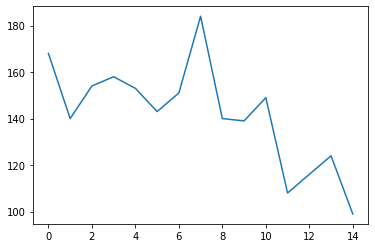

In [18]:
df.total_deaths.plot()

## What year had the largest percent drop in traffic fatalities?

You calculate percentage change on a column using using `.pct_change()`.

TypeError: cannot perform __truediv__ with this index type: DatetimeArray

## Complete the following sentence, using the year from the last question

`Compared to the previous year, in____ there was a ____% drop in traffic fatalities.` Just type it in a comment, no need to use f-strings or anything. 